# Let this N=500 simulation run for ~

In [82]:
using Test
using StaticArrays
using Random
using Plots
import Pkg
using Statistics

Pkg.activate(joinpath(@__DIR__, "../../../"))
using segc_wl   # or the module name inside segc_wl.jl


  Activating project at `~/Documents/montecarlo/segc_wl`


In [83]:
# input_path = joinpath(@__DIR__, "wl_checkpoin.jdl2")

wl = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/test/lambda_max_opt/N500_M100_NMin_366_no_overlap/wl_checkpoint.jld2")

WangLandauVars(1.0, [0 0 … 16 9; 0 0 … 29 0; … ; 0 0 … 2 0; 0 0 … 5 0], [0.0 0.0 … 16.0 9.0; 0.0 0.0 … 29.0 0.0; … ; 0.0 0.0 … 2.0 0.0; 0.0 0.0 … 5.0 0.0], 885906329, 452660168, 295293671, 169516647, 1181200000, 0.00472755635944752)

In [84]:
wl.logf


1.0

In [102]:
println(minimum(wl.H_λN[:,366:501])) # hasnt even visited all states
println(maximum(wl.H_λN)) 


0
191041


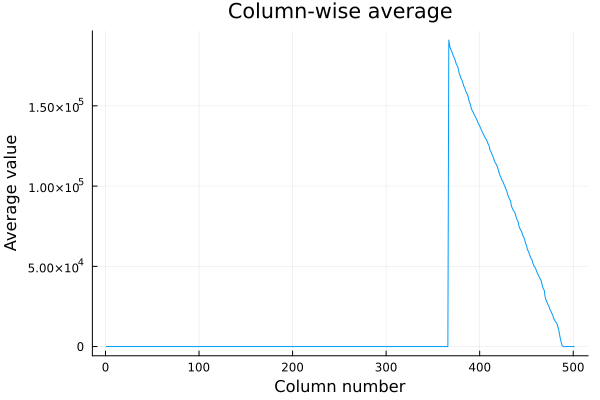

In [86]:


# Example array (remove this if you already have A)
# A = rand(10, 501)
A = wl.H_λN
# -------------------------
# 1. Average of columns vs column index
# -------------------------
col_avg = mean(A, dims=1)[:]      # size: 501
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    title = "Column-wise average",
    legend = false
)

# -------------------------
# 2. Average of rows vs row index
# -------------------------
row_avg = mean(A, dims=2)[:]      # size: 10
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    title = "Row-wise average",
    legend = false
)

# -------------------------
# 3. 3D plot: row, column → value
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

# -------------------------
# Display all three
# -------------------------
plot(p1)



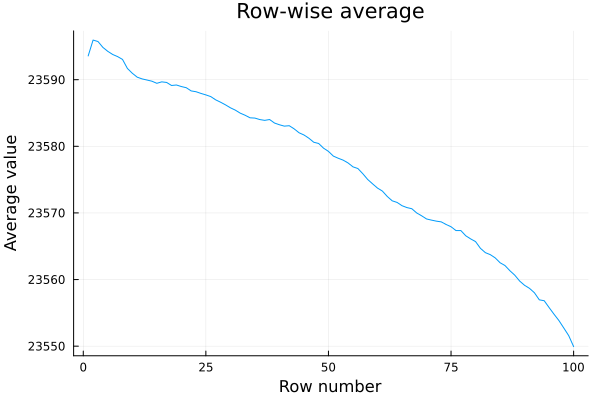

In [87]:
plot(p2)


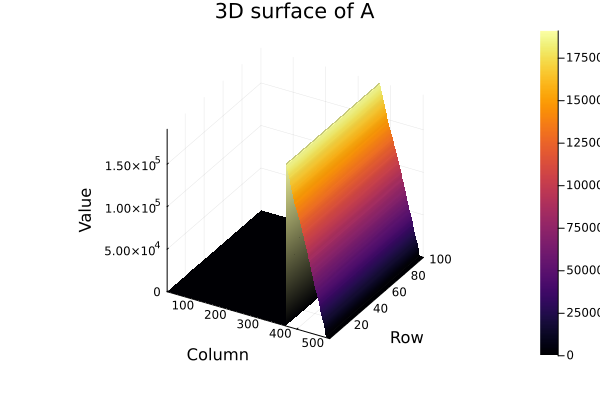

In [88]:
plot(p3)

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194


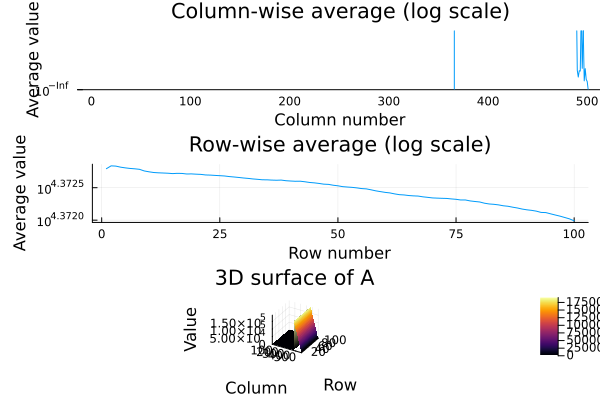

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/xC48f/src/utils.jl:105


In [89]:
using Statistics
using Plots

# -------------------------
# Column averages (log y)
# -------------------------
col_avg = mean(A, dims=1)[:]
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Column-wise average (log scale)",
    legend = false
)

# -------------------------
# Row averages (log y)
# -------------------------
row_avg = mean(A, dims=2)[:]
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Row-wise average (log scale)",
    legend = false
)

# -------------------------
# 3D surface (linear)
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

plot(p1, p2, p3, layout = (3, 1))


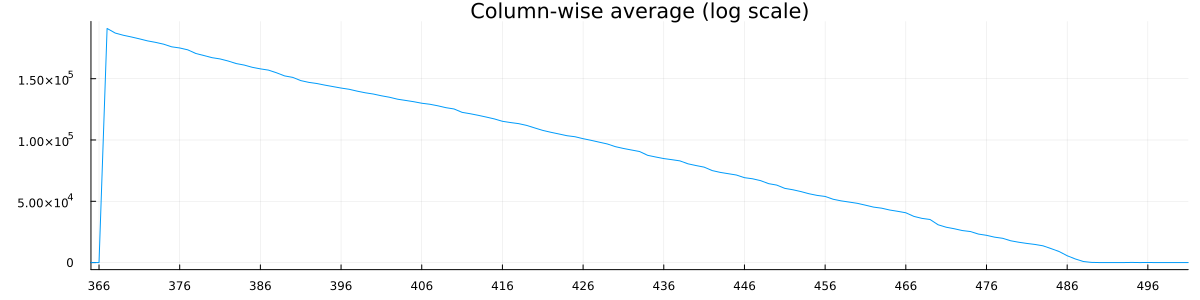

In [98]:
p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    xlims = (365,501),
    title = "Column-wise average (log scale)",
    legend = false, 
    xticks = 366:10:501,
    size = (1200, 300)
)
plot(p1)

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194


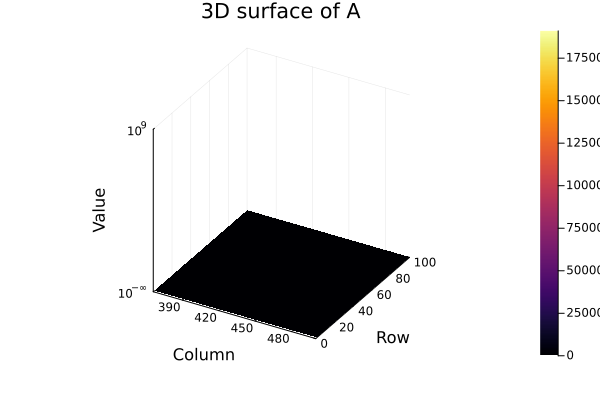

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194


In [91]:
p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A",
    zscale = :log10,
    zlims = (0,1000000000),
    xlims = (366,500),
    ylims = (0,100)
)

plot( p3)

In [92]:
println(minimum(wl.H_λN[:,366:501])) # hasnt even visited all states
println(minimum(wl.H_λN[:,367:501]))
display(wl.H_λN[:,365:501]) 

0
0


100×137 Matrix{Int64}:
 0  0  191003  187201  185361  184038  …   5    3   6    1   1   4   3  16  9
 0  0  191034  187211  185386  184049     35   27  20   23  14  41  22  29  0
 0  0  191035  187211  185379  184045     28   26  17   34  18  44  17  39  0
 0  0  191041  187204  185387  184059     31    5   6   37  16  42  39  28  0
 0  0  191028  187234  185387  184060     39    6   5   36  23  34  43  37  0
 0  0  191034  187236  185382  184059  …  52    6   2   38  27  50  26  16  0
 0  0  191036  187246  185380  184066     46    2  16   35  27  42  31  15  0
 0  0  191022  187252  185391  184076     35   12   7   30   7  46  34  11  0
 0  0  191019  187256  185395  184078     38   12   2   30  12  51  23  17  0
 0  0  191020  187269  185385  184022     32   11   8   10  31  55  19  18  0
 0  0  191028  187259  185397  184002  …  19   20  16    5  34  60  34   5  0
 0  0  191032  187259  185399  184008     46   22  12   27  30  57  50   5  0
 0  0  191024  187255  185410  184025    

why is N = 366 not visited??

In [93]:
size(wl.H_λN)

(100, 501)